<table >
    <colgroup>
       <col span="1" style="width: 20%;text-align: left">
       <col span="1" style="width: 20%;text-align: left">
        <col span="1" style="width: 70%;text-align: left">
    </colgroup>
  <td style="background-color: white; vertical-align: top">
   <img src="../../FH_Koblenz.svg" width="100%" float="left"/>
  </td>
  <td style="text-align:left; background-color: white; vertical-align: top; line-height: 0.8;">
    <span style="color:#6e6f72ff;font-size:10px"> Prof. Dr.-Ing. Fábio Bisogno<br>Hochschule Koblenz<br>Fachbereich Ingenieurwesen<br>Elektrotechnik und Informationstechnik<br>E-mail: bisogno@hs-koblenz.de<br>Raum: G078 </span>
  </td>
    <td style="text-align:left; background-color: white; vertical-align: top">
    <span style="color:#6e6f72ff;font-size:10px"> </span>
  </td>
</table>

# Elektronik I

## Aufgaben (g)

<img src="../Ele1-0-Ab07.svg" width="300"/>

10. Entwerfen Sie eine Beispielschaltung mittels der normalisierten Parameter im Frequenzbereich

R = 0.5 Ohm
L = 1.989436788648692e-05 H
C = 5.0929581789406506e-05 F
f1 = 3385.164807134504 Hz
f2 = 7385.1648071345035 Hz
Qn = 1.25
xi = 0.4


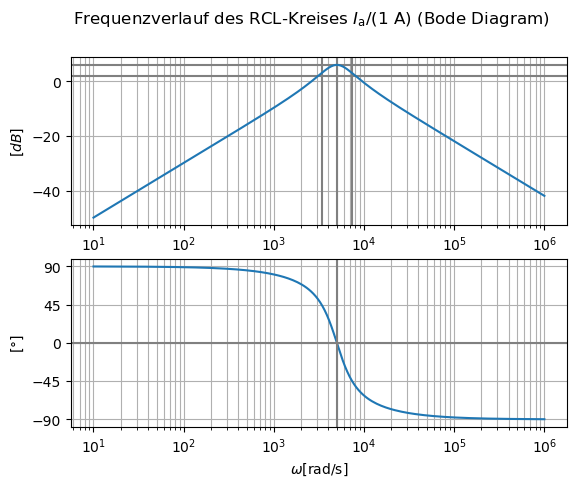

In [1]:
# Entwurfbeispiel (Frequenzraum)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

########################################################################
# Entwerfen Sie eine Schaltung im Frequenzraum mit folgenden Parametern

Ue = 1  # Eingangsspannung AC
Kn = 2  # Verstärkungsfaktor bei der Eigenfrequenz Transkonduktanz (Ia/Ue)
fn = 5e3  # Eigenfrequenz
BW = 4e3 # Bandbreite

########################################################################

# Schaltungsentwurf

# Kn=Ia/Ue
# Bei der Resonanzfrequenz ist der Schaltkreis rein resistiv.
# Kn=1/R
########################################################################
# R=1/Kn
########################################################################

# C = 1 / (wn^2 L)
# Qn = fn / BW
# Qn = L wn / R

########################################################################
# L = Qn R / wn
# C = 1 / (wn^2 L)
########################################################################

R = 1 / Kn  # Lastwiderstand
print(f'R = {R} Ohm')
wn = 2*np.pi*fn  # Eigenfrequenz oder Resonanzfrequenz

Qn = fn/BW
L = Qn*R / wn
print(f'L = {L} H')
C = 1 / (wn**2*L)
print(f'C = {C} F')

w1 = wn*(np.sqrt(1+1/(4*Qn**2))-1/(2*Qn)) # Grenzfrequenz 1 [rad/s]
w2 = wn*(np.sqrt(1+1/(4*Qn**2))+1/(2*Qn)) # Grenzfrequenz 2 [rad/s]

f1 = w1/(2*np.pi) # Grenzfrequenz 1 [Hz]
f2 = w2/(2*np.pi) # Grenzfrequenz 2 [Hz]

print(f'f1 = {f1} Hz')
print(f'f2 = {f2} Hz')
print(f'Qn = {Qn}')
xi=1/(2*Qn)
print(f'xi = {xi}')

f=np.logspace(1,6,200)
w=2*np.pi*f

s=1j*w

G1=(s/L)/(s**2+2*xi*wn*s+wn**2)

Gdb=20*np.log10(abs(G1))

KndB = 20*np.log10(Kn)
Kg = KndB-3

GPh=np.angle(G1,deg=True)

fig,(ax0,ax1) = plt.subplots(2)
ax0.axhline(KndB,color='gray')
ax0.axhline(Kn,color='gray')
ax0.axvline(fn,color='gray')
ax0.axvline(f1,color='gray')
ax0.axvline(f2,color='gray')
ax0.plot(f,Gdb)
ax0.set_xscale('log')
ax0.grid(which='both')

fig.suptitle('Frequenzverlauf des RCL-Kreises $I_\mathrm{a}/(1~\mathrm{A})$ (Bode Diagram)')
ax1.set_xlabel('$\omega [\mathrm{rad/s}]$')
ax0.set_ylabel('$[dB]$')

ax1.plot(f,GPh)
ax1.set_ylabel('$[°]$')
ax1.set_xscale('log')
ax1.grid(which='both')
ax1.axhline(0,color='gray')
ax1.axvline(fn,color='gray')
ax1.set_yticks([-90,-45,0,45,90])

None

# LTspice Simulationen

<img src="1-g-10-01.svg" width="800" />